In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"D:\PYTON PROGRAMMING\PYTHON FILES\PANDAS\PANDAS-MODULE-PRACTICE\NETFLIX DATA ANALYSIS\DATA FILE\netflix_titles.csv")

# Basic Pandas Practice Questions – Netflix Dataset (Set 1)

In [ ]:
print(df.head(5),"\n")
print(df.shape,"\n")
print(df.columns)

## Data cleaning And Inspection

--> Count how many rows and columns are there in the dataset.

In [ ]:
rows = df.shape[0]   # Calculate the number of rows.
columns = df.shape[1]   # Calculate the number of columns.

print(rows)
print(columns)

--> Are there any missing values? If so, in which columns and how many?

In [ ]:
values = df.isnull().sum()
print(values)

--> Drop all rows with missing values and store in a new DataFrame.

In [24]:
cleaned_df = df.dropna()

--> What are the data types of each column?

In [ ]:
types = cleaned_df.columns
print(types.dtype)

-->  Convert the date_added column to datetime.

In [12]:
df = df.rename(columns = {'date_added':'datetime'},inplace=True)

## Exploratory Data Analysis (EDA)

--> How many unique types (e.g., Movie, TV Show) are there? Count them.

In [ ]:
df.groupby("type").size()

--> What is the most common genre (listed_in)?

In [ ]:
value_counts = df['listed_in'].value_counts()
most_common = value_counts.idxmax()
most_common

--> How many titles were added each year?

In [ ]:
count = df.groupby('release_year')['title'].count()
sorted_count = count.sort_values(ascending=0)
sorted_count

--> Find the top 10 countries by the number of titles produced.

In [ ]:
top = df['country'].value_counts()  # It returns a Series
top.head(3)

--> Show a table of total Movie vs TV Show count per country.

In [ ]:
country_content = df.groupby(['country', 'type']).size().unstack(fill_value=0).sort_index(key=lambda x: x.str.lower())
country_content

## Filtering and selection

--> List of movies released in 2020.

In [ ]:
mov_2020 = df[(df['type'] == 'Movie') & (df['release_year'] == 2020)]
mov_2020.reset_index(inplace=True)
mov_2020['title']

--> Find all titles that have the word “Love” in their title.

In [ ]:
title = df[df['title'].str.contains('Love', case = False, na=False)]['title']
title

--> List all TV Shows produced in India.

In [ ]:
tv_ind = df[(df['type'] == 'TV Show') & (df['country'] == 'India')]['title']
tv_ind

--> Find entries with duration more than 100 minutes (Hint: strip 'min' and convert to int).

In [ ]:
movies = df[ df['type'] == 'Movie']
extracted_numbers = movies['duration'].str.extract(r'(\d+)', expand=False)
duration = pd.to_numeric(extracted_numbers, errors='coerce')

1. When expand=False, the function returns:

2. A Series if the regex has only one capturing group ( ).

3. A DataFrame if the regex has multiple capturing groups ( ) ( ).

--> Display all titles where rating is "TV-MA" and type is "Movie".

In [ ]:
tv_ma_rat = df[(df['type'] == 'Movie') & (df['rating'] == 'TV-MA')]['title']
tv_ma_rat

## Aggregations & GroupBy

--> Group titles by release year and show the count.

In [ ]:
relese_year = df.groupby('release_year')['title']
count = relese_year.size()
count

--> Find the average duration of movies in minutes.

In [ ]:
movies = df[ df['type'] == 'Movie']
extracted_numbers = movies['duration'].str.extract(r'(\d+)', expand=False)
duration = pd.to_numeric(extracted_numbers, errors='coerce')

avg = duration.agg('mean')
print(f"{avg:.2f} mins")

--> Group by type and show the average number of cast members per title (Hint: use .str.split(',') and count length).

In [ ]:
df['cast_split'] = df['cast'].str.split(',').str.len().fillna(0)
avg_cast = df.groupby('type')['cast_split'].mean().round(2)
avg_cast

## Column Operation 

--> Create a new column called decade (e.g., 1990s, 2000s, etc.) based on release_year.

In [ ]:
df['decade'] = df['release_year'].apply(lambda x: f"{str(x)[:3]}0s")
df

--> Create a column title_length that shows the number of characters in the title.

In [ ]:
df['title_length'] = df['title'].apply(lambda x : f"{len(str(x))}")
df

--> Extract the first genre from listed_in into a new column.

In [ ]:
df['first_genre'] = df['listed_in'].str.split(',').str[0]
df

--> What percentage of titles are produced by more than one country?

In [ ]:
multi_country = df['country'].dropna().str.contains(',')
percentage = (multi_country.sum() / df['country'].dropna().shape[0]) * 100
print(f"{percentage:.2f}% of titles are produced by more than one country.")

--> Create a frequency table of top 10 directors.

In [ ]:
df_cleaned = df.dropna(subset=['director'])
grouped = df_cleaned.groupby(['director', 'type']).size()
table = grouped.unstack(fill_value=0)
table['total'] = table.sum(axis=1)
top_directors = table.sort_values(by='total', ascending=False).head(10)

top_directors

--> Use value_counts() to find the most common duration for TV Shows.

In [ ]:
tv_shows = df[df['type'] == 'TV Show']
duration = tv_shows['duration']
common = duration.value_counts().idxmax()
print(f"The most common duration for a TV Show is {common}.")

# Advanced Pandas Practice Questions – Netflix Dataset (Set 2)

#

## Filtering & Conditions

--> Find all movies released in 2020 with a duration longer than 90 minutes.

In [ ]:
df['duration_int'] = df['duration'].dropna().str.extract('(\d+)').astype(int)     # \d	Matches any digit (0-9),  +	(One or more occurrences of the previous pattern),   ()   (Captures the matched group) 
movies = df[(df['type'] == 'Movie') & (df['release_year'] == 2020) & (df['duration_int'] > 90)]
df = df.drop('duration_int',axis=1)
movies

--> List all entries where the country field is missing.

In [ ]:
missing_country_rows = df[df['country'].isna()]
missing_country_rows

--> How many shows were released in India and are TV Shows?

In [ ]:
ind_tvshow = df[(df['country'] == 'India') & (df['type'] == 'TV Show')].shape[0]
print(f"There are a total of {ind_tvshow} TV Shows released by India.")

There are a total of 79 TV Shows released by India.


--> List all titles that contain the word “Christmas” and were released in December.

In [ ]:
# Create boolean masks for both conditions
is_christmas = df['title'].str.contains('Christmas', case=False, na=False)
is_december = df['date_added'].str.split().str[0] == 'December'

# Apply both filters at once
christmas_cont = df[is_christmas & is_december]

# If you want just the titles:
christmas_titles = christmas_cont['title']
christmas_cont

## DateTime-Based

--> Convert the 'date_added' column to datetime and find the oldest release in the dataset.

In [ ]:
# Rename the column (without inplace assignment)
df.rename(columns={'date_added': 'datetime'}, inplace=True)

# Convert to datetime
df['datetime'] = pd.to_datetime(
    df['datetime'],
    format='mixed',
    errors='coerce' # Error handling
)
oldest_release = df.loc[df['datetime'].dropna().idxmin()]

oldest_release

--> How many titles were added in each month of 2021?

In [ ]:
in_2021 = df[df['datetime'].dt.year == 2021]

# Group by month and count titles
monthly_counts = in_2021.groupby(in_2021['datetime'].dt.month)['title'].count()

# Display the result
print(monthly_counts)


--> Find the most common weekday on which content is added.

In [ ]:
weekday_counts = df['day_name'].value_counts()
max_day = weekday_counts.idxmax()
max_day

--> List all shows added on a Sunday.

In [ ]:
sunday_release = df[df['day_name'] == 'Sunday']
sunday_release

--> Which year had the highest number of releases on Netflix?

In [68]:
highest_release = df.groupby('release_year')['title'].count().idxmax()
highest_release

np.int64(2018)

#

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2021,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 📈 Data Visualization

In [4]:
import matplotlib.pyplot as plt

--> Make a bar plot to show the average added periode for a movie to Netflix in each year.

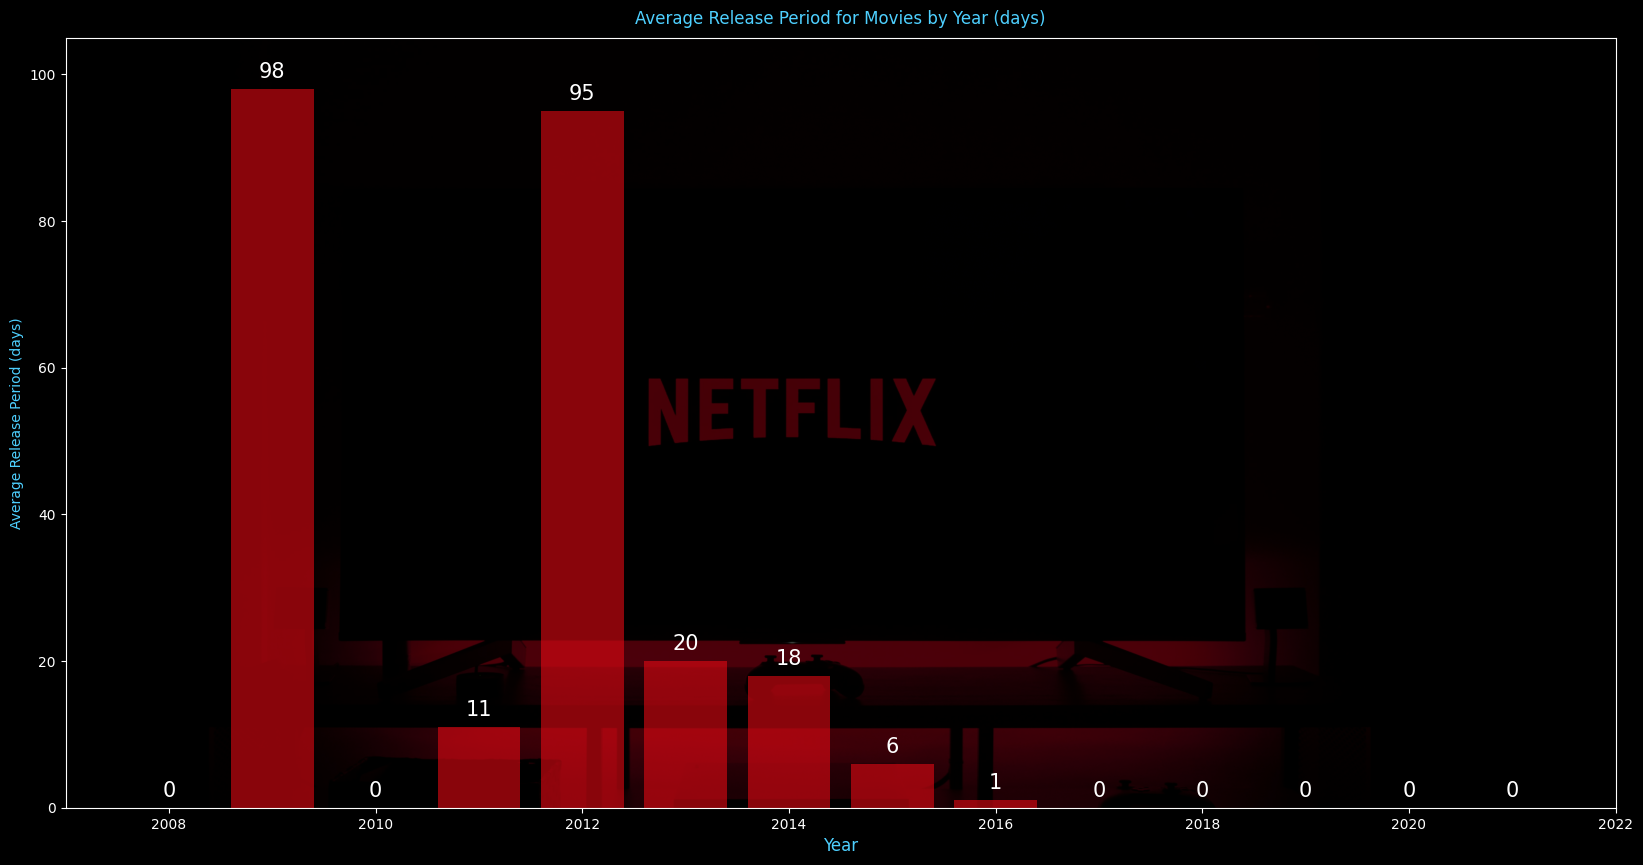

In [42]:
import matplotlib.image as mpimg
img = mpimg.imread(r"C:\Users\LENOVO\Downloads\thibault-penin-AWOl7qqsffM-unsplash.jpg")



df['fil_date'] = pd.to_datetime(df['date_added'], format='mixed',errors='coerce')
df['year'] = df['fil_date'].dt.year

movie = df[df['type'] == 'Movie']
avg_rel_per = movie.groupby('year')['fil_date'].apply(lambda x: (x.max() - x.min()).days / len(x)).round(0)

fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor('black')

ax.set_facecolor('black')

for spines in ax.spines.values():
    spines.set_edgecolor('white')

ax.tick_params(axis='both', colors='white') 
    
bars = ax.bar(
    avg_rel_per.index, 
    avg_rel_per.values,
    color = '#E50914',
    width = 0.8,
    alpha = 0.6
)
for bar in bars :
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{int(height)}", ha='center', va='bottom', fontsize=15, color='white')

ax.set_xlabel('Year',fontsize=12, color="#4ED0FF")
ax.set_ylabel('Average Release Period (days)', color='#4ED0FF')
ax.set_title('Average Release Period for Movies by Year (days)', color='#4ED0FF', pad=10)

ax.imshow(img, 
          alpha=0.3, 
          extent=(2007, 2021, -10, 105),  # Match your xlim and ylim
          aspect='auto',
          zorder=0)

plt.xlim(2007,2022)
plt.ylim(0,105)
plt.show()

--> Make a plot to show how is the growth of Netflix over years.

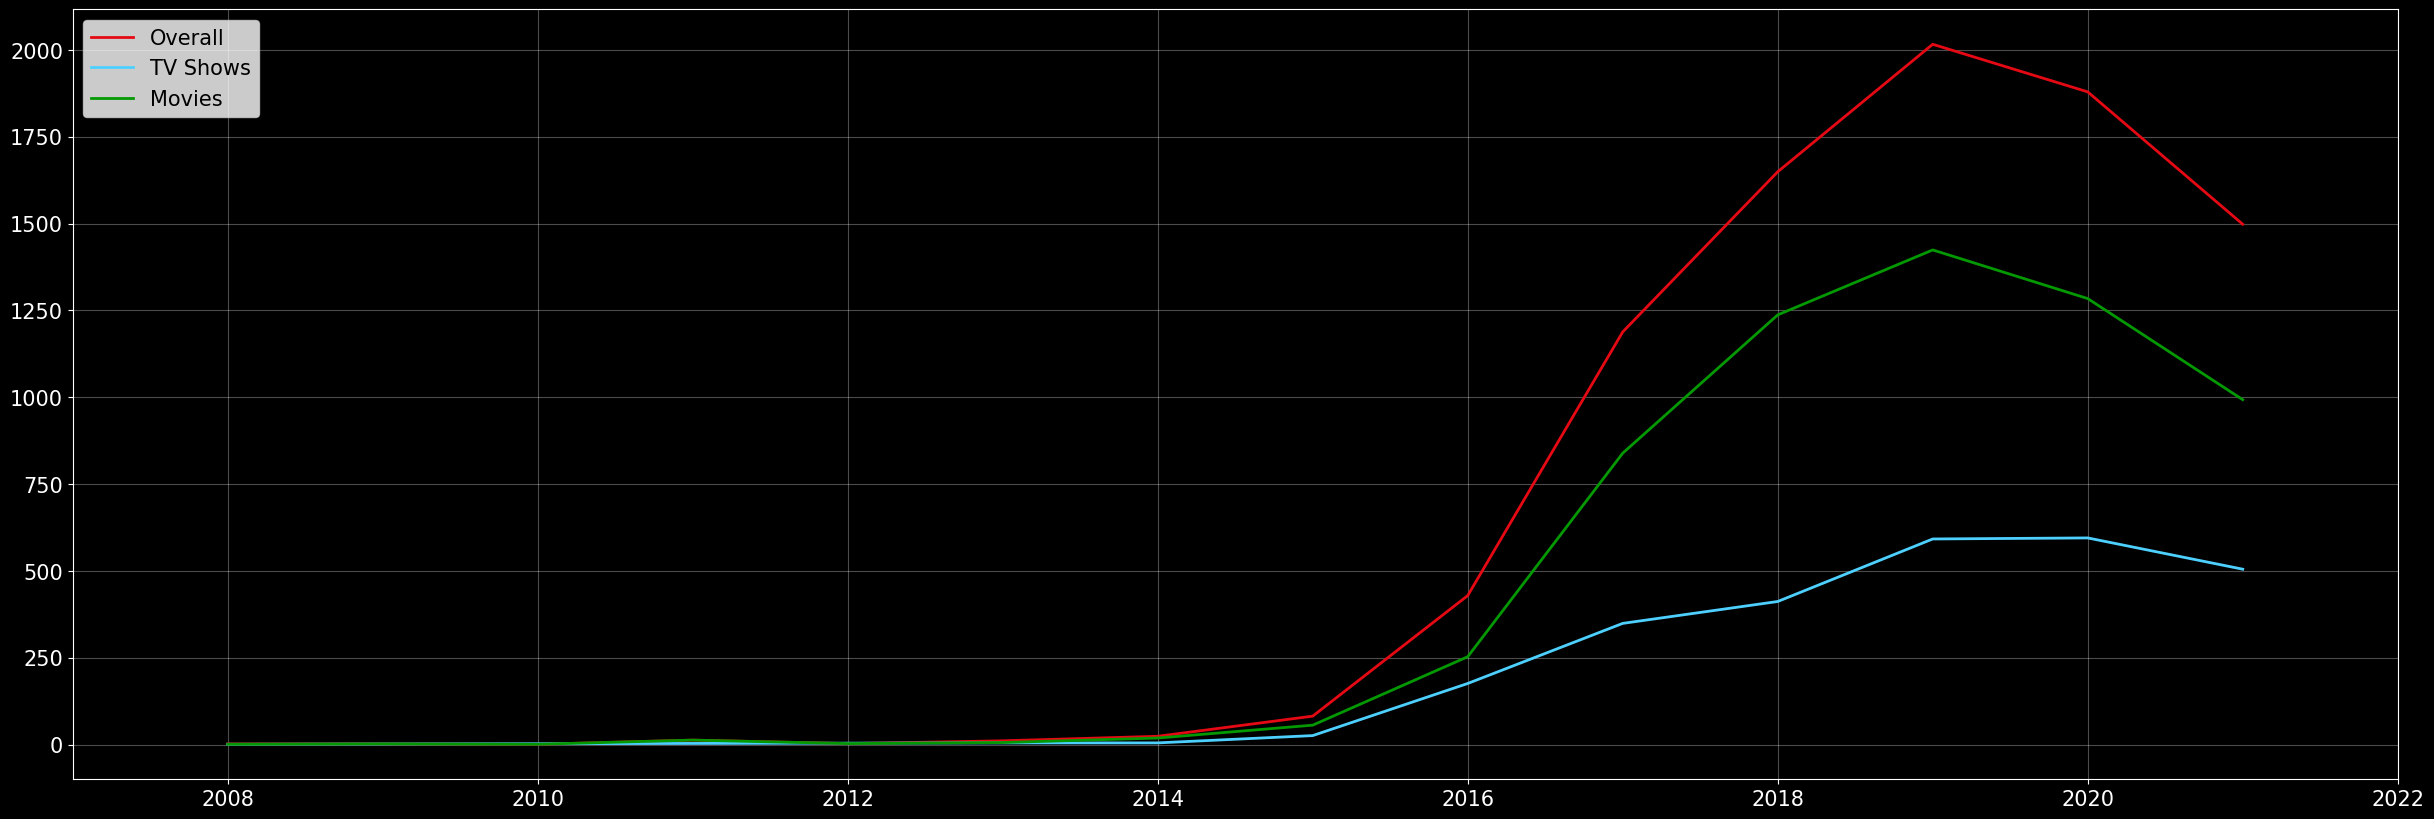

In [25]:
no_of_prog = df.groupby('year')['title'].count()
no_of_tv_show = df[df['type'] == 'TV Show'].groupby('year')['type'].count()
no_of_movie = df[df['type'] == 'Movie'].groupby('year')['type'].count()

fig, ax = plt.subplots(figsize=(30,10))

fig.set_facecolor('black')
ax.set_facecolor('black')

for spines in ax.spines.values():
    spines.set_edgecolor('white')

ax.tick_params(axis='both', colors='white') 

ax.plot(
    no_of_prog.index,
    no_of_prog.values,
    color = '#E50914',
    linewidth = 2,
    label = 'Overall'
)
ax.plot(
    no_of_tv_show.index,
    no_of_tv_show.values,
    color = '#4ED0FF',
    linewidth = 2,
    label = 'TV Shows'
)
ax.plot(
    no_of_movie.index,
    no_of_movie.values,
    color = "#049902",
    linewidth = 2,
    label = 'Movies'
)


plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlim(2007,2022)

plt.grid(color='white', linestyle='-', alpha=0.3)
plt.legend(loc='upper left', fontsize = 15)
plt.show()